In [4]:
#!pip install tensorflow

In [5]:
#!pip install keras

In [1]:
#!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

In [ ]:
#!pip list

In [5]:
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
#bringing in tensorflow datasets for fashion mnst
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [8]:
# use tensorflow datatasets api to bring in the datasource
df=tfds.load('fashion_mnist',split='train')

In [13]:
df

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [9]:
df.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

# Visualize Data and build pipeline

In [10]:
import numpy as np

In [11]:
#setup iterator
dataiterator=df.as_numpy_iterator()

In [12]:
# getting data out of the pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

TypeError: Invalid shape (28,) for image data

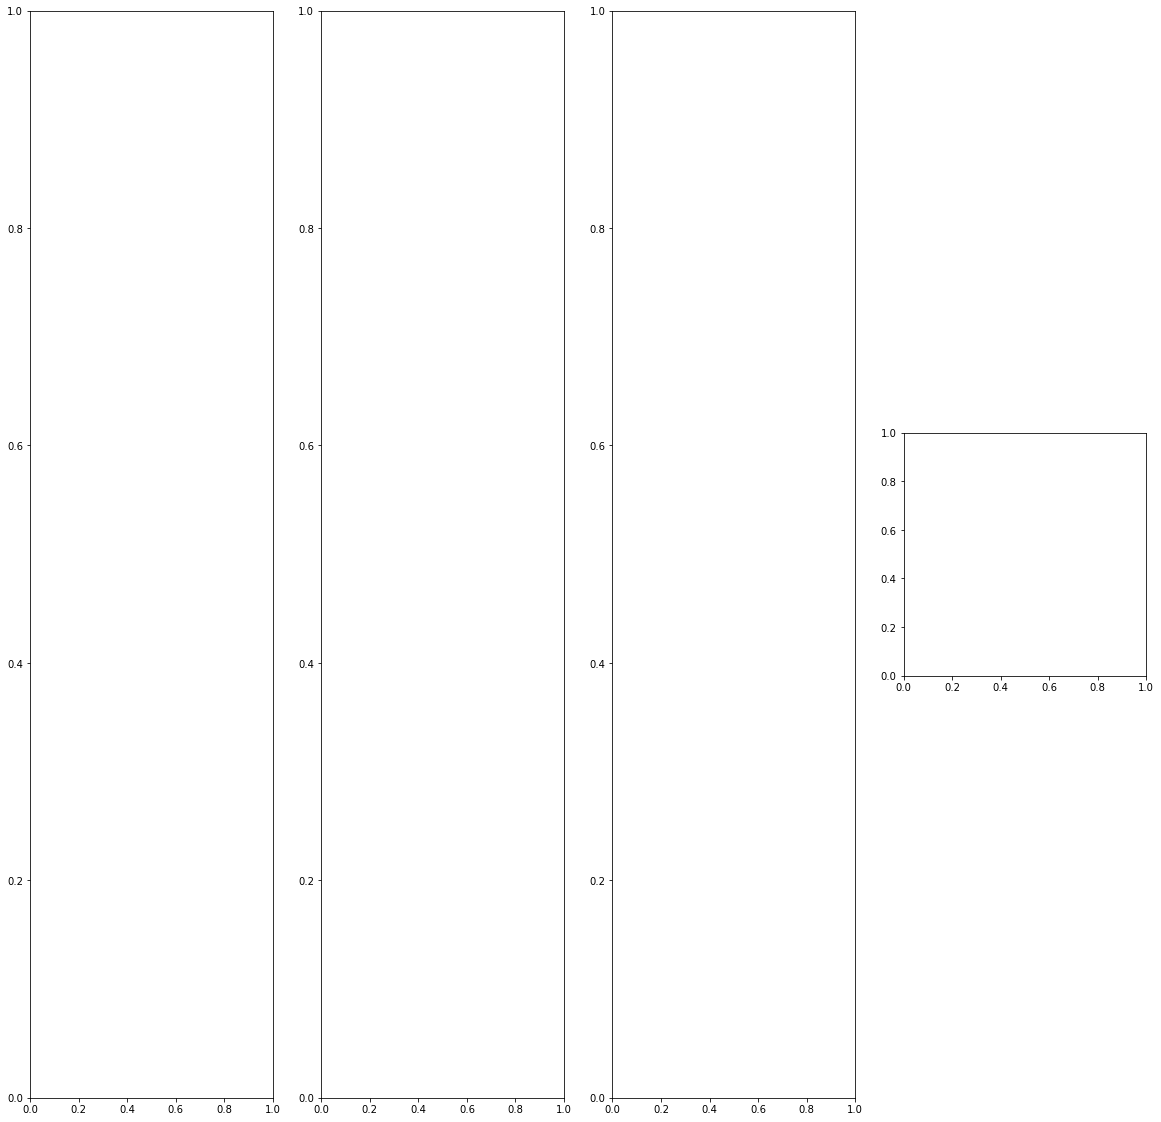

In [53]:
#from pylab import*
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
#looping through the images
for idx,img  in enumerate(img):
    
    ax[idx]=imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)
    

In [15]:
# function to scale images and return
def scale_images(data):
    image=data['image']
    return image/255
    

In [17]:
#reload the dataset
df=tfds.load('fashion_mnist',split='train')
#running the dataset through the scale preprocessing step
df=df.map(scale_images)
#cache the dataset for that batch
df=df.cache()
# shuffling it up
df=df.shuffle(60000)
# batch into 128 samples per image
df=df.batch(128)
# reduces the likelihood of bottleneck  
df=df.prefetch(64)

# Building Neural Network

In [19]:
#importing the model components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [41]:
def build_generator():
    model=Sequential()
    
    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
#upsampling block1
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
#upsampling block2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
#downsampling block1
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
#downsampling block2
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
# conv layer to get one channel
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))
    return model
              
              
    

In [42]:
test_model=build_generator()

In [43]:
test_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_5 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [51]:
img=test_model.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 0s 281ms/step


array([[[[0.5028117 ],
         [0.50121677],
         [0.4984107 ],
         ...,
         [0.49084696],
         [0.49395204],
         [0.49511823]],

        [[0.50280863],
         [0.5017916 ],
         [0.49794564],
         ...,
         [0.48936427],
         [0.4898315 ],
         [0.49260387]],

        [[0.5007774 ],
         [0.49697718],
         [0.4964356 ],
         ...,
         [0.49193615],
         [0.4896687 ],
         [0.49680245]],

        ...,

        [[0.4991238 ],
         [0.4985674 ],
         [0.5064664 ],
         ...,
         [0.5051442 ],
         [0.50029886],
         [0.49685887]],

        [[0.4965268 ],
         [0.49228567],
         [0.49547148],
         ...,
         [0.49955097],
         [0.49636263],
         [0.4989899 ]],

        [[0.49777272],
         [0.5013551 ],
         [0.5006778 ],
         ...,
         [0.49683303],
         [0.4956298 ],
         [0.4994583 ]]],


       [[[0.5006052 ],
         [0.49557868],
         [0.49